<center>
<p><img src="https://mcd.unison.mx/wp-content/themes/awaken/img/logo_mcd.png" width="100">
</p>


# Curso Propedéutico en *Bases de Datos*

# Análisis de datos a partir de una base de datos en MySQL:
# Egresos Hospitalarios de la [Secreteria de Salud](http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html)


**Feliciano Robles Andrade**


In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import requests

Entro a mi github, entro al modo raw del .csv y procedo a copiar el link y ponerlo en df_url, para asi poder cargar el .csv utilizado para el analisis

In [135]:
df_url = 'https://raw.githubusercontent.com/FelicianoRoblesAndrade/BdD/main/ss_2023.csv?token=GHSAT0AAAAAACTBVQ4VVYLQT42VPC6CMFO2ZTFMHPA'
df0 = pd.read_csv(df_url, engine='python',delimiter=';',encoding="latin-1")
df0.head(5)

,entidad,jurisdiccion,municipio,localidad,consultorios,camas_censables,camas_no_censables,mdc_gral_esp_odon,per_medico_en_adiestramiento,medicos_en_otras_act,per_de_enfermeria_en_contacto_c_paciente,per_de_enfermerica_en_otras_labores,otro_per_prof,per_tec,otro_per
0,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,14,0,0,0,0,1,0,0,116,2,42
1,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,3,0,0,3,1,1,11,0,1,1,4
2,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,7,0,0,7,0,1,11,0,2,3,5
3,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,4,0,0,6,1,1,15,0,0,4,7
4,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,AGUASCALIENTES,7,0,0,11,2,1,12,0,2,3,7


Al ver este dataframe, los datos que considero que son mas relevantes es la cantidad por entidad, de consultorios, medicos generales/especialistas/odontologos y las personas tecnicas que se encuentran en dichos hospitales en la republica

In [144]:
# Copia de seguridad
df=df_0
# Agrupo los datos por entidad, y a los valores numericos relevantes les calculo un promedio
df=df.groupby(['entidad'])[['consultorios','mdc_gral_esp_odon','per_tec']].mean()
df=df.reset_index()
# Cambio el nombre de mis columnas
df=df.rename(columns={'consultorios':'consultorios_prom','mdc_gral_esp_odon':'mdc_gral_esp_odon_prom','per_tec':'per_tec_prom'})
# Un vistaso de como quedo el dataframe
df.head(10)

,entidad,consultorios_prom,mdc_gral_esp_odon_prom,per_tec_prom
0,AGUASCALIENTES,4.594828,9.887931,3.370690
1,BAJA CALIFORNIA,3.888889,6.206349,1.962963
2,BAJA CALIFORNIA SUR,3.152941,6.235294,2.447059
3,CAMPECHE,3.314516,7.483871,2.072581
4,CHIAPAS,2.370714,4.054680,1.781279
5,CHIHUAHUA,3.987705,7.778689,3.139344
6,CIUDAD DE MEXICO,11.416862,25.995316,14.194379
7,COAHUILA DE ZARAGOZA,3.941799,6.100529,2.449735
8,COLIMA,3.828767,4.636986,1.260274
9,DURANGO,2.605166,5.487085,1.837638


# Datos relevantes
Teneomos un dataframe de los 32 estados de Mexico, junto con informacion acerca de los promedios de valores de interes, por lo que podemos afirmar ciertas cosas

In [177]:
for i in range(len(df)):
  for i2 in df:
    if df[i2][i]==df[i2].max():
        if i2=="entidad":
          continue
        else:
          print(f'Estado con mayor(es) {i2}:\n{df["entidad"][i]}\n')
    if df[i2][i]==df[i2].min():
        if i2=="entidad":
          continue
        else:
          print(f'Estado con menor(es) {i2}:\n{df["entidad"][i]}\n')

Estado con mayor(es) consultorios_prom:
CIUDAD DE MEXICO

Estado con mayor(es) mdc_gral_esp_odon_prom:
CIUDAD DE MEXICO

Estado con mayor(es) per_tec_prom:
CIUDAD DE MEXICO

Estado con menor(es) consultorios_prom:
GUERRERO

Estado con menor(es) mdc_gral_esp_odon_prom:
NUEVO LEON

Estado con menor(es) per_tec_prom:
TLAXCALA



Calculamos que entidades tienen mas medicos generales, especialistas y odontologos, que el promedio de todos los estados

In [189]:
filtered_df=df[df['mdc_gral_esp_odon_prom']>df['mdc_gral_esp_odon_prom'].mean()]
filtered_df[['entidad','mdc_gral_esp_odon_prom']]

,entidad,mdc_gral_esp_odon_prom
0,AGUASCALIENTES,9.887931
3,CAMPECHE,7.483871
5,CHIHUAHUA,7.778689
6,CIUDAD DE MEXICO,25.995316
10,GUANAJUATO,7.134494
13,JALISCO,6.678625
15,MICHOACAN DE OCAMPO,7.559633
24,SINALOA,6.734940
27,TAMAULIPAS,6.521246
30,YUCATAN,9.163842


Por ultimo tomo en consideracion la grafica en la que se relaciona la cantidad de medicos generales, especialistas y odontologos con la cantidad de consultorios, esperando que haya una relacion realativamente directa, ya que tendria sentido que entre mayor cantidad de personal, mayor sera la cantidad de instalaciones que se necesitan para distribuirlos

In [207]:
df[md]

0      9.887931
1      6.206349
2      6.235294
3      7.483871
4      4.054680
5      7.778689
6     25.995316
7      6.100529
8      4.636986
9      5.487085
10     7.134494
11     4.133525
12     4.458410
13     6.678625
14     6.105386
15     7.559633
16     5.604839
17     4.399281
18     2.842825
19     3.609409
20     5.251682
21     6.177686
22     4.926267
23     2.987342
24     6.734940
25     5.457766
26     5.562814
27     6.521246
28     5.734884
29     5.941110
30     9.163842
31     5.531008
Name: mdc_gral_esp_odon_prom, dtype: float64

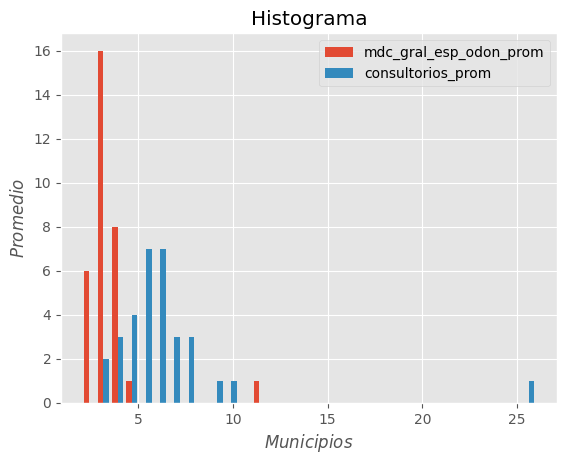

In [220]:
md='mdc_gral_esp_odon_prom'
c='consultorios_prom'
v1=df[c]
v2=df[md]
v12=[v1,v2]
with plt.style.context(('ggplot')):
  plt.hist(v12, bins = 32, linewidth=2, label = [md,c])
  plt.xlabel("$Municipios$")
  plt.ylabel("$Promedio$")
  plt.title("Histograma")
  plt.legend(fontsize = 10)
  plt.show()

Curiosamente como se puede apreciar, los picos no coinciden, asi que no es tan cierto que la mayoria de medicos no implica que tambien que hay la misma cantidad/proporcion de consultorios, por lo que hay mas factores que influyen esta variacion, que en un futuro valdra la pena revisar y analizar.

Al observar la tabla con todos los datos, se ve claramente como la ciudad de mexico es un elemento que supera en todos los aspectos a la mayoria por un rango considerable, lo cual podria explicarse por la gran concentracion de gente que se encuentra en el, pero a la vez como es nuestra capital, y donde la mayoria de los avances suceden

In [181]:
def print_table(df):
    print(tabulate(df, headers='keys', tablefmt='psql'))
print_table(df)

+----+---------------------------------+---------------------+--------------------------+----------------+
|    | entidad                         |   consultorios_prom |   mdc_gral_esp_odon_prom |   per_tec_prom |
|----+---------------------------------+---------------------+--------------------------+----------------|
|  0 | AGUASCALIENTES                  |             4.59483 |                  9.88793 |        3.37069 |
|  1 | BAJA CALIFORNIA                 |             3.88889 |                  6.20635 |        1.96296 |
|  2 | BAJA CALIFORNIA SUR             |             3.15294 |                  6.23529 |        2.44706 |
|  3 | CAMPECHE                        |             3.31452 |                  7.48387 |        2.07258 |
|  4 | CHIAPAS                         |             2.37071 |                  4.05468 |        1.78128 |
|  5 | CHIHUAHUA                       |             3.9877  |                  7.77869 |        3.13934 |
|  6 | CIUDAD DE MEXICO              